In [16]:
# This notebook analyses the ouput of 
# running complexity.py

! grep 'parsing_for_temporal_criticality:' temporal_experiment.txt | grep -v Computing | sed "s/parsing_for_temporal_criticality: //g" > temp.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp IC_temp" && cat temp.csv) | sed "s/ /,/g" > IC_temp.csv 
! head IC_temp.csv

cityname,i_o_length,prediction_horizon,grid_size,time_stamp,IC_temp
london,4,1,55,8690,2023.0
london,4,1,55,2322,13546.0
london,4,1,55,1344,0
london,4,1,55,457,0
london,4,1,55,4165,0
london,4,1,55,2852,88230.0
london,4,1,55,8076,0
london,4,1,55,8359,4426.0
london,4,1,55,4844,0


In [10]:
! grep 'parsing_model_predict_for_temporal_errors:' temporal_experiment.txt | grep -v Computing | sed "s/parsing_model_predict_for_temporal_errors: //g" > temp.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp MSE_train" && cat temp.csv) | sed "s/ /,/g" > MSE_train.csv 
! head MSE_train.csv

cityname,i_o_length,prediction_horizon,grid_size,time_stamp,MSE_train
london,4,1,55,6186,572.6820343084005
london,4,1,55,2567,1112.6274732135505
london,4,1,55,6995,77.31917388550411
london,4,1,55,2199,664.5395202581343
london,4,1,55,7619,596.9484468020097
london,4,1,55,989,543.3245300371875
london,4,1,55,1361,107.280795731589
london,4,1,55,909,741.7383566180869
london,4,1,55,7886,550.9545254857748


Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'IC_temp'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8965/8965 [00:01<00:00, 6230.10it/s]


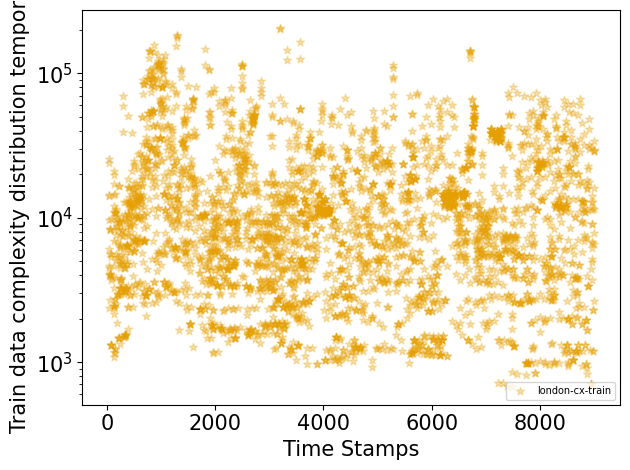

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'IC_temp'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8963/8963 [00:01<00:00, 4711.27it/s]


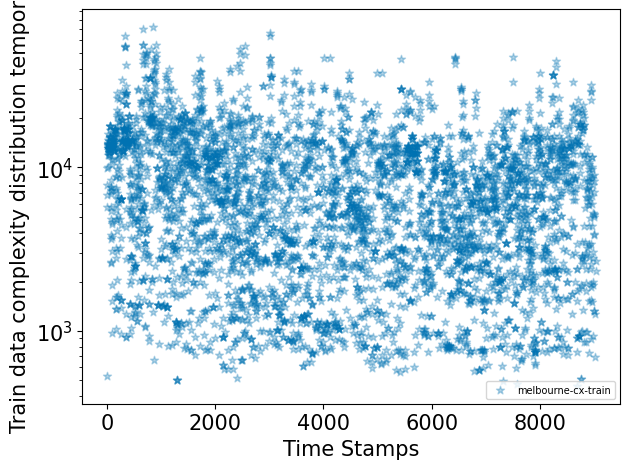

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'IC_temp'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8965/8965 [00:01<00:00, 6338.08it/s]


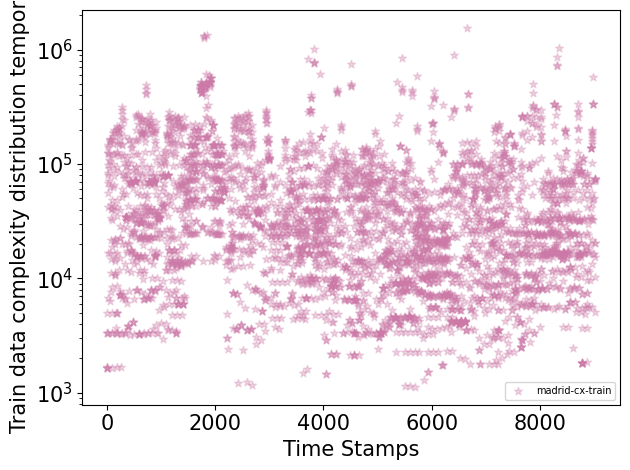

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


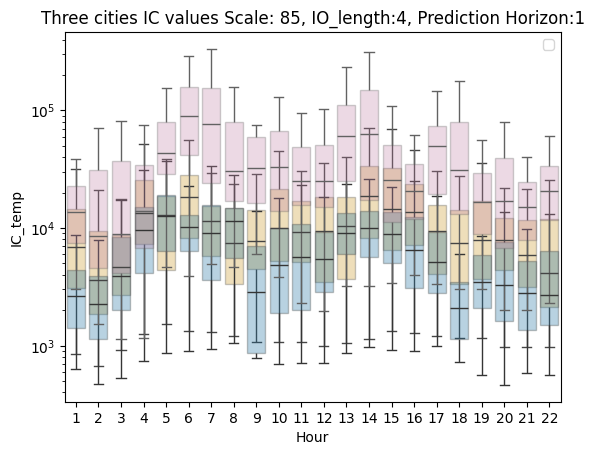

Hour
1      34178.889706
2      20838.643033
3      28255.273968
4      46199.949109
5      66542.698139
6     113314.333070
7     108596.206406
8      77134.477053
9      86562.761029
10     75334.697802
11     54354.582774
12     58168.878452
13     78321.285460
14     85663.430672
15     44167.753906
16     31803.625954
17     72866.225540
18     77004.965909
19     37323.186667
20     33697.957090
21     31427.860465
22     49808.103659
Name: IC_temp, dtype: float64


In [64]:
city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:
    cityname = city.lower()

    for CSR_type in [
    'IC_temp',
        ]:

        cityname = city.lower()
        city_label_printed = []
        
        df = pd.read_csv("IC_temp.csv")        
        print (df.columns)
        x = []
        y = []
        for scale in [55]: 
            for i_o_length in [4]:
                for pred_horiz in [1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC_temp'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["IC_temp"] > 0]    
    
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC_temp", color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
# plt.ylim(1, 600)
plt.yscale('log')
plt.legend()

plt.savefig(str(key) + "_IC_Temp_Train.png", dpi=300)
plt.show()


hourly_sum = df_cx.groupby('Hour')['IC_temp'].mean()
print(hourly_sum)

hourly_mean_IC = hourly_sum.tolist() 


Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'MSE_train'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8941/8941 [00:01<00:00, 6370.26it/s]


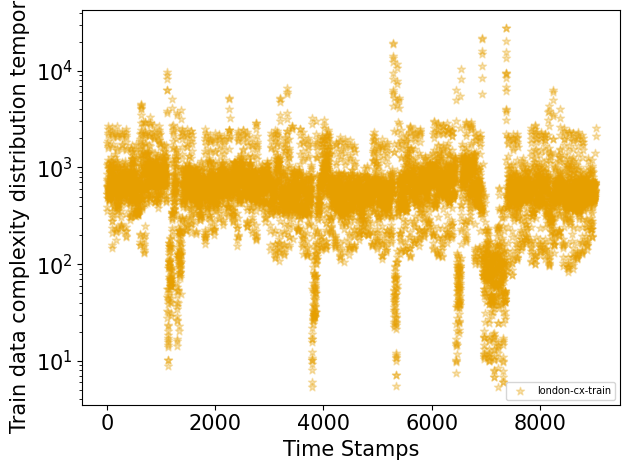

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'MSE_train'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8938/8938 [00:01<00:00, 6009.89it/s]


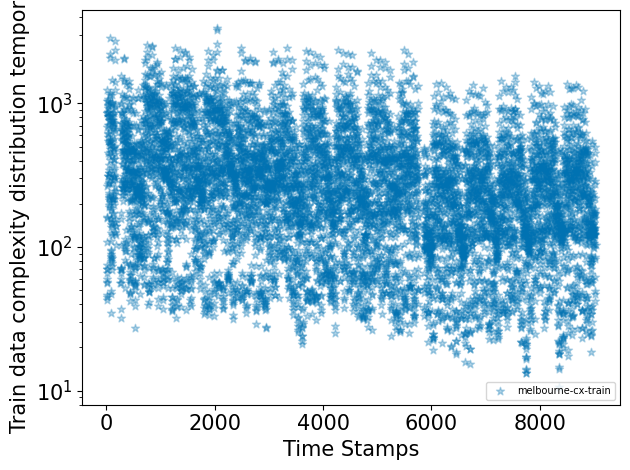

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size',
       'time_stamp', 'MSE_train'],
      dtype='object')


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8940/8940 [00:01<00:00, 6144.50it/s]


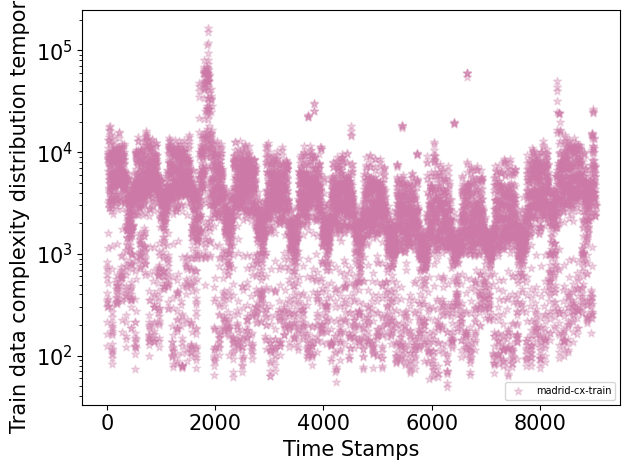

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


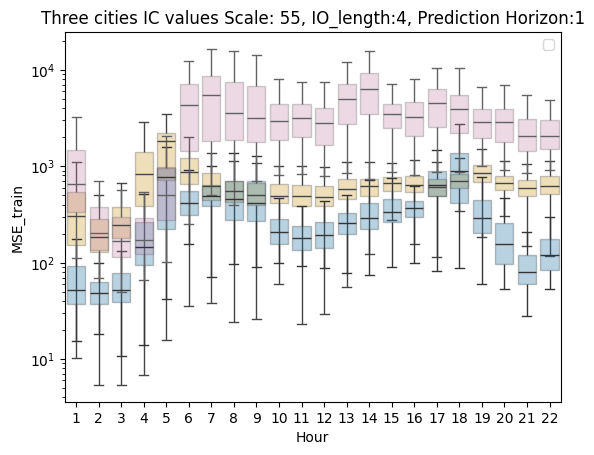

Hour
1     1332.261245
2      399.352010
3      313.093050
4      451.670056
5      845.832931
6     4815.684423
7     5778.107035
8     5212.342913
9     5021.046798
10    3808.042669
11    3866.959854
12    3638.249200
13    5503.775611
14    7629.872243
15    4044.600467
16    4001.528524
17    5577.429381
18    5316.269490
19    3821.117886
20    3699.323607
21    3226.133992
22    2764.197215
Name: MSE_train, dtype: float64


In [65]:
city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:
    cityname = city.lower()

    for CSR_type in [
    'MSE_train',
        ]:

        cityname = city.lower()
        city_label_printed = []
        
        df = pd.read_csv("MSE_train.csv")        
        print (df.columns)
        x = []
        y = []
        for scale in [55]: 
            for i_o_length in [4]:
                for pred_horiz in [1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
sys.path.append("../../")
# ! pip install -r ../../../requirements.txt

import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'MSE_train'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["MSE_train"] > 0]    
    
    ax = sns.boxplot(data=df_cx, x="Hour", y="MSE_train", color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)
    
plt.title(r"Three cities IC values Scale: 55, IO_length:4, Prediction Horizon:1")
# plt.ylim(1, 600)
plt.yscale('log')
plt.legend()

plt.savefig(str(key) + "_Temp_Train_Error.png", dpi=300)
plt.show()

hourly_sum = df_cx.groupby('Hour')['MSE_train'].mean()
print(hourly_sum)

hourly_mean_MSE = hourly_sum.tolist() 


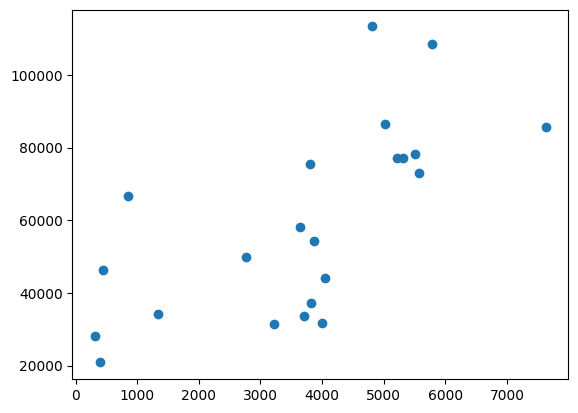

In [66]:
plt.scatter(hourly_mean_MSE, hourly_mean_IC)

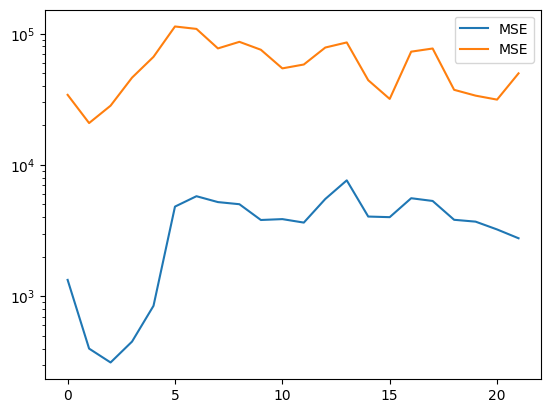

In [71]:
plt.plot(hourly_mean_MSE, label="MSE")
plt.plot(hourly_mean_IC, label="MSE")
plt.legend()
plt.yscale("log")
plt.show()